# Tasks 2020
***

## Task 1 - Computing Square Root of 2 to 100 Decimal Places

The task is to compute the square root of 2 to 100 decimal places, but without using external modules, just standard python. One of the difficulties is that standard python doesn't support floating points with the required precision. Most  web search results for extending the precision of floating points suggest to use the Decimal module. [[1]](#References)

There are many methods for computing the square root of a number.[[2]](#References) [[3]](#References) Eventually I settled on an algorithm called, Square Roots by Subtraction. According to the paper, I found it in, it is an old Japanese method. [[4]](#References) 

### Square Roots by Subtraction algorithm

I chose this method because I could (mostly ) understand how it works but most importantly it uses normal integers as opposed to floating points, thereby bypassing standard pythons inability to handle large floating point decimals.As a consequence it doesnt suffer from loss of precision due to rounding errors. This method does not converge as quickly as Newton's Method.[[4]](#References) 

#### Algorithm Steps

The algorithm has an initial step, then either step R1 or R2 is taken depending on the values of $a$ and $b$.

* Initial Step 

To find the square root of $n$
Let $ a = 5n $ and $ b = 5 $

* Repeated Steps

(R1) If $ a ≥ b $, replace a with $ a − b $, and add $ 10 $ to $ b $.

(R2) If $ a < b$, add two zeroes to the end of $a$, and add a zero to $b$ just before
the final digit (which will always be ‘5’).

* Conclusion

Then the digits of $b$ approach more and more closely the digits of the square
root of $n$.


#### Example of the Algorithm using a perfect square

In this example I will try to find the square root of 25. So $a = 5n = 125, b = 5$.


$ (125,5)$  R1 $\Rightarrow (120,15)$  R1 $\Rightarrow (105,25)$  R1 $\Rightarrow (80,35)$  R1 $\Rightarrow (45,45)$  R1 $\Rightarrow (0,55)$  R2 $\Rightarrow (0,505)$  R2 $\Rightarrow (0,5005)$  R2 $\Rightarrow (0,50005)$  R2 $\Rightarrow (0,500005)$





In [1]:
# Function to calculate the square root of 2 to 100 decimal places
# Adapted from ref [5] https://www.mathblog.dk/project-euler-80-digits-irrational-square-roots/
def sqrt2():
    limit = 10 ** 102 # sets the decimal precision limit
    n = 2 # variable n , the number of which we will find the square root
    a = 5 * n # variable a, the starting point of the algorithm
    b = 5 # variable b, the starting point of the algorithm
    while (b < limit):  #loop until b is equal to limit
        if (a >= b):   # if a is greater than or equal to b
            a -= b     # a is assigned a - b
            b +=10     #b is assigned b + 10
            #print('a is ' + str(a)) # used for debugging
            #print('b is ' + str(b)) # used for debugging

        else:    # else if a is not greater than or equal to b
            a*= 100               # a is assigned a*100
            b = 10 * b - 45       # b is assigned 10*b - 45. This is the equivalent of putting a zero before the final digit of b
            #print('a is ' + str(a)) # used for debugging
            #print('b is ' + str(b)) # used for debugging
    x = str(b)    # turn b into a string
    result = x[:1] + '.' + x[1:-2] # slice the string and concatanate the decimal point. Also remove the 05 on the end, added by the algorithm
    #print(len(result)) #Check if have right accuracy, 100 decimal places 
    print(result)  # print square root of 2

In [2]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Task 2 - Chi-squared ($\chi^2$) test for independence

The following contingency table represents samples from 4 neighbourhoods (A,B,C and D).A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar" [9].


|              | A   | B   | C   | D   | Total | 
|--------------|-----|-----|-----|-----|-------| 
| White Collar | 90  | 60  | 104 | 95  | 349   | 
| Blue Collar  | 30  | 50  | 51  | 20  | 151   | 
| No Collar    | 30  | 40  | 45  | 35  | 150   | 
| Total        | 150 | 150 | 200 | 150 | 650   | 

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.

To calculate the $\chi^2$ test statistic, I will use the scipy.stats.chi2_contingency function. This function returns the $\chi^2$ test statistic, the $p$ value, the degrees of freedom and the expected frequencies of the table [[8]](#References) .

In [3]:
import scipy.stats as ss
import numpy as np

# make the contingency table with a numpy array
white = [90,60,104,95]
blue = [30,50,51,20]
no_collar = [30,40,45,35]
collars = np.array([white, blue, no_collar])

result = ss.chi2_contingency(collars) # calculate the chi squared, p value, degrees of freedom and expected values array.
chi_squared_value, p, dof = result[0], result[1], result[2]


print(f"The chi-squared value for the contingency table above with {dof} degrees of freedom, is {chi_squared_value} with a p value of {p}.")


The chi-squared value for the contingency table above with 6 degrees of freedom, is 24.5712028585826 with a p value of 0.0004098425861096696.


The p-value is what we use to determine significance (or independence in this case). In general, we are looking for a threshold at either 0.05 or 0.01. In this instance we can reject the null hypothesis, if we get a p-value below the chosen threshold [[7]](#Refernces). In this test, we get a $p$ value of 0.0004 which is below both thresholds stated earlier. With this information, we can reject teh hypothesis that each person's neighborhood of residence is independent of the person's occupational classification.

## Task 3 - MS Excel formulas for Standard Deviation

There are two formulas in MS Excel to calculate the standard deviation, STDEV.P and STDEV.S. The former calculates the standard deviation of a population, and the latter, for a sample of a population.

The formula for  Population Standard Deviation is : $\sigma = \sqrt(\frac{\sum_{i=0}^{N}(x_{i} - \mu)^2}{N})$  where $x_{i}$ is each value from the population, $\mu$ is the population mean and $N$ is the size of the population.  

The formula for  Sample Standard Deviation is : $s_{x} = \sqrt(\frac{\sum_{i=0}^{n}(x_{i} - \bar x)^2}{n - 1})$ where $x_{i}$ is each value in the sample population, $\bar x$ is the sample mean and $n$ is the number of samples.

For $s_x$ we divide by $n - 1$. This is known as the Bessel's Correction [[11]](#References). Dividing by $n − 1$ rather than by $N$ gives an unbiased estimate of the variance of the larger parent population [[13]](#References)

Now I will use numpy to demonsrate that $s_x$ is more accurate to find the standard deviation of a sample of a population, than the formula for population standard deviation , $\sigma$ , applied to a sample.

In [4]:
population = np.random.randint(1,500,50) # Create a population of random integers between 1 and 500.
population

array([302, 296, 411, 451, 165, 319,  69, 185, 254, 360,   9, 104, 335,
       328, 488,  64, 476, 289, 184,  18, 178,  42, 299, 293,  55, 290,
       174, 172,   7,  92, 169, 430, 289, 425, 222, 289, 273, 484,  39,
       362, 436,  92, 259, 398, 219, 307, 210, 123, 493, 269])

In [5]:
sigma = np.std(population) # finds the population standard deviation
print(f"The standard deviation of the population is {sigma}.")

The standard deviation of the population is 138.83838230114898.


In [6]:
population[0:25]

array([302, 296, 411, 451, 165, 319,  69, 185, 254, 360,   9, 104, 335,
       328, 488,  64, 476, 289, 184,  18, 178,  42, 299, 293,  55])

In [7]:
# Take a sample of 25 from the population 
sample1 = population[0:25]
sample1

array([302, 296, 411, 451, 165, 319,  69, 185, 254, 360,   9, 104, 335,
       328, 488,  64, 476, 289, 184,  18, 178,  42, 299, 293,  55])

In [8]:
sigma_sample1 = np.std(sample1)
print(f"The standard deviation using the population formula gives a standard deviation of {sigma_sample1}.")
sx_sample1 = np.std(sample1,ddof=1) # https://numpy.org/doc/stable/reference/generated/numpy.std.html#:~:text=The%20standard%20deviation%20is%20the,N%20%3D%20len(x)%20.
print(f"The standard deviation using the sample formula gives a standard deviation of {sx_sample1}.")

The standard deviation using the population formula gives a standard deviation of 143.47528846459937.
The standard deviation using the sample formula gives a standard deviation of 146.43385309870575.


As we can see above sample standard deviation $s_x$ is closer to the population standard deviation $\sigma$, than the formula for population standard deviation applied to a sample.

## Task 4 - Iris Data set, K-means clustering

I will apply K-means clustering to the Fisher Iris dataset, using the python sklearn package.

In [9]:
# imports and load the dataset intpo a dataframe
import seaborn as sns
import sklearn.cluster as skcl
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')

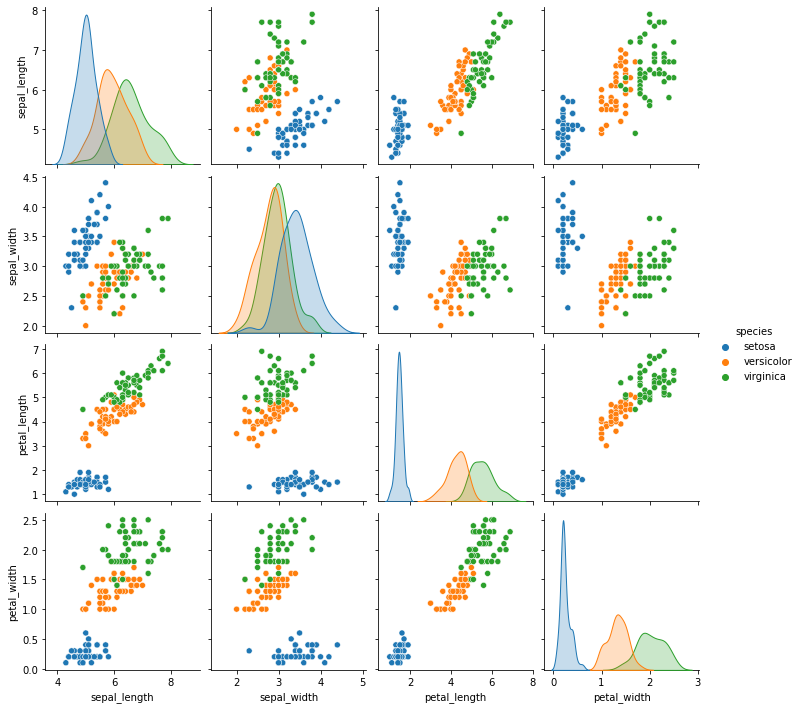

In [10]:
# pair plot of the dataset
sns.pairplot(df,hue='species');

### Sepal length, Sepal width

Using sepal length and sepal width, I will attempt to cluster the dataset.

In [11]:
# Adapted from https://stackoverflow.com/a/43160595
#Create a numpy array to use with sklearn
X = df[['sepal_length','sepal_width']].to_numpy()

# create another column in the datframe mapping the species to a number. To be used as a colormap, when plotting
df.loc[df['species'] == 'setosa', 'target'] = 0
df.loc[df['species'] == 'versicolor', 'target'] = 1
df.loc[df['species'] == 'virginica', 'target'] = 2
y = df['target']



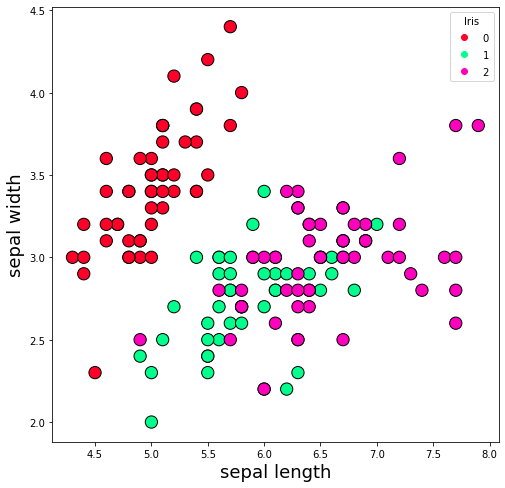

In [12]:
# Adapted from https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
# make a scatter plot of sepal length, sepal width using the known species as a colormap
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Iris")
plt.xlabel('sepal length',fontsize = 18)
plt.ylabel('sepal width',fontsize = 18);

In [13]:
# Perform kmeans fitting looking for 3 clusters
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [14]:
# labels to be used in comparison plot
new_labels = kmeans.labels_


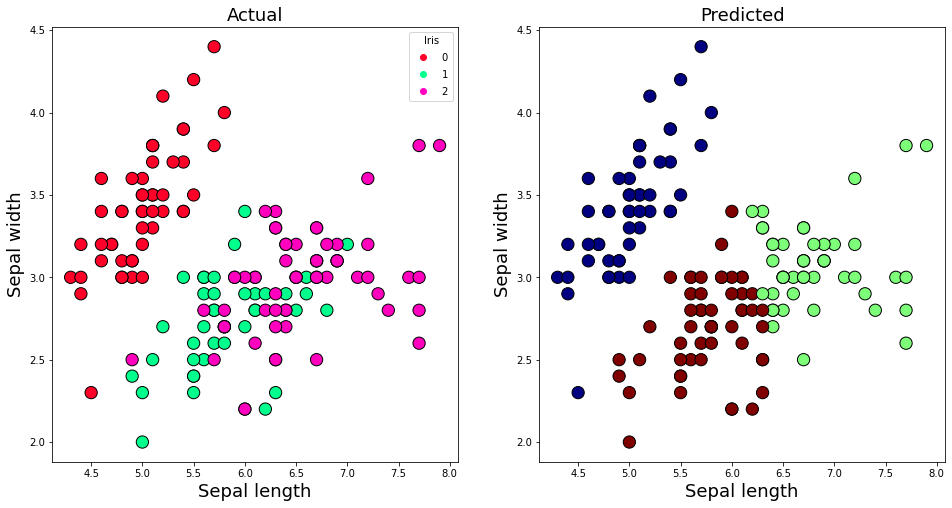

In [15]:
# Adapted from https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
# Create a plot of the actual vs predicted categories
fig, axes = plt.subplots(1, 2, figsize=(16,8))


axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
legend0 = axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);


### Sepal length, Petal length
Using sepal length and petal length, I will attempt to cluster the dataset.

In [16]:
# Create numpy array with sepal length and petal length
X = df[['sepal_length','petal_length']].to_numpy()

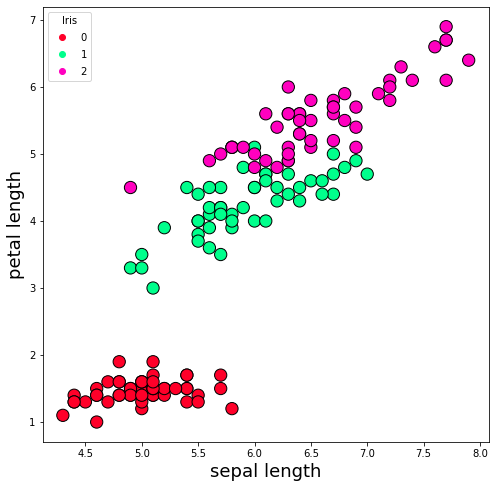

In [17]:
# Plot of speal length vs petal lentgh
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1],c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
ax.legend(*scatter.legend_elements(),loc="best", title="Iris")


plt.xlabel('sepal length',fontsize = 18)
plt.ylabel('petal length',fontsize = 18);

In [18]:
# perform the clustering
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [19]:
# labels for comparison plot
new_labels = kmeans.labels_

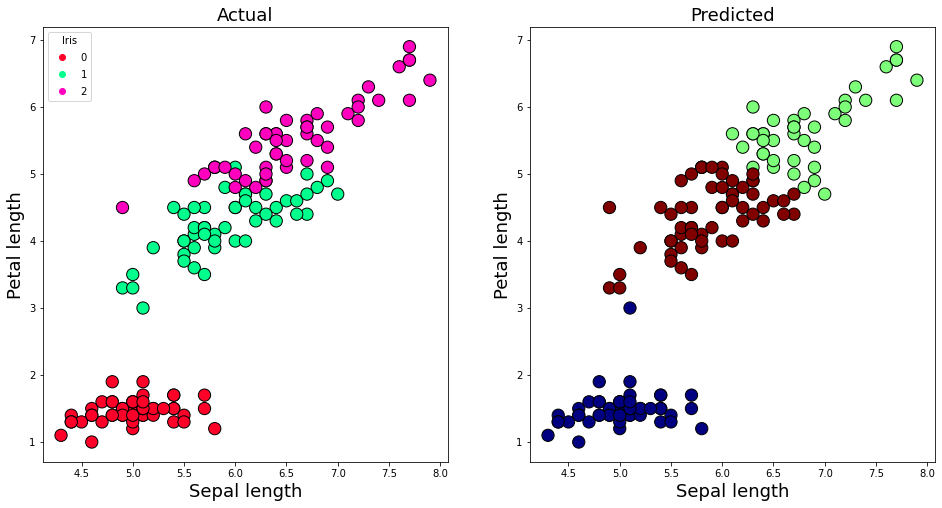

In [20]:
# Plots of actual and predicted for comparison
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Petal length', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Petal length', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

### Sepal length, Petal width
Using sepal length and petal width, I will attempt to cluster the dataset.

In [21]:
# Create numpy array for the clustering
X = df[['sepal_length','petal_width']].to_numpy()

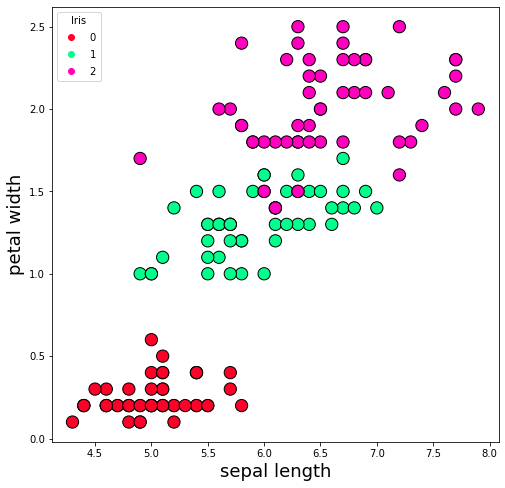

In [22]:
# Plot of sepal length and petal width
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1],c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
ax.legend(*scatter.legend_elements(),loc="best", title="Iris")

plt.xlabel('sepal length',fontsize = 18)
plt.ylabel('petal width',fontsize = 18);

In [23]:
# Perform the clustering
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)


In [24]:
# labels for the comparison plot
new_labels = kmeans.labels_


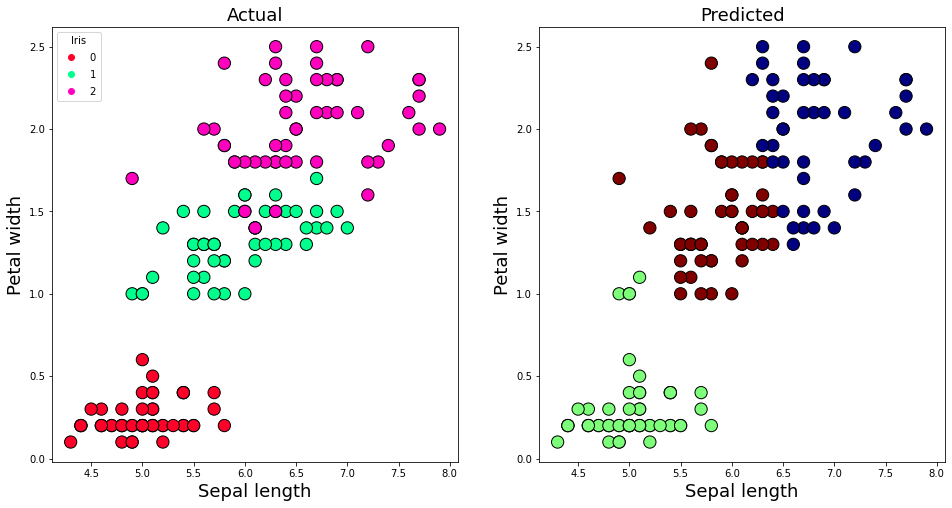

In [25]:
# Comparison plot of actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

### Sepal width, Petal length
Using sepal width and petal length, I will attempt to cluster the dataset.

In [26]:
# Create a numpy array for sklearn clustering
X = df[['sepal_width','petal_length']].to_numpy()

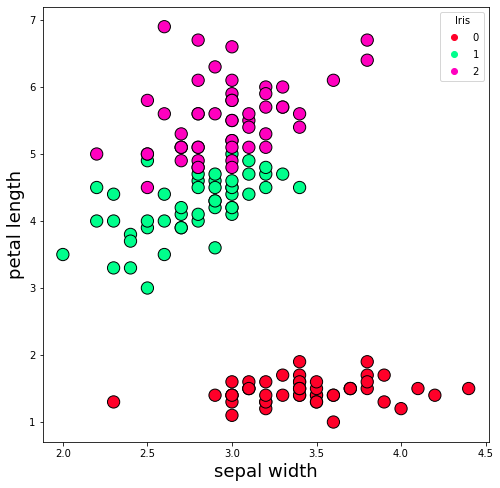

In [27]:
# Plot of sepal width and petal length
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1],c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
ax.legend(*scatter.legend_elements(),loc="best", title="Iris")

plt.xlabel('sepal width',fontsize = 18)
plt.ylabel('petal length',fontsize = 18);

In [28]:
# Perform the clustering
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [29]:
# labels for comparison plot
new_labels = kmeans.labels_

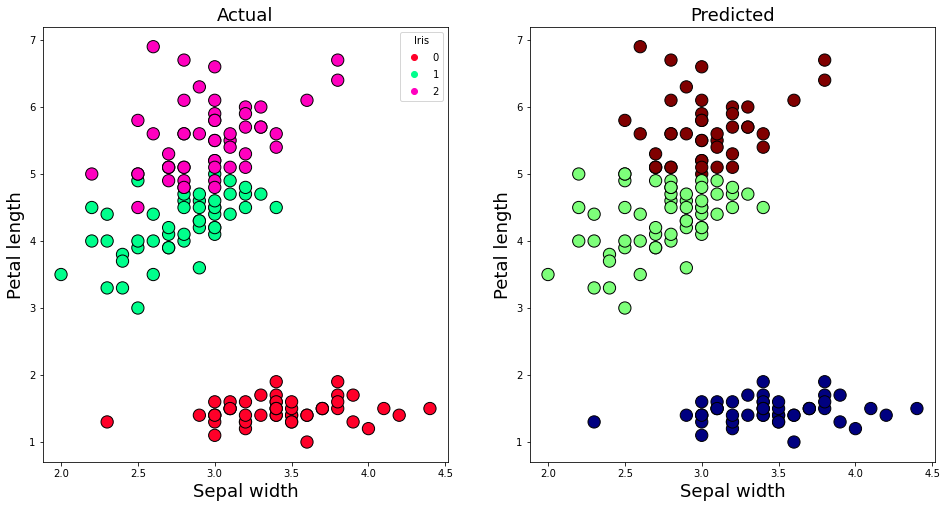

In [30]:
# Comparison plot of actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Sepal width', fontsize=18)
axes[0].set_ylabel('Petal length', fontsize=18)
axes[1].set_xlabel('Sepal width', fontsize=18)
axes[1].set_ylabel('Petal length', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

### Sepal width, Petal width
Using sepal width and petal width, I will attempt to cluster the dataset.

In [31]:
# create a numpy array for sklearn clustering
X = df[['sepal_width','petal_width']].to_numpy()

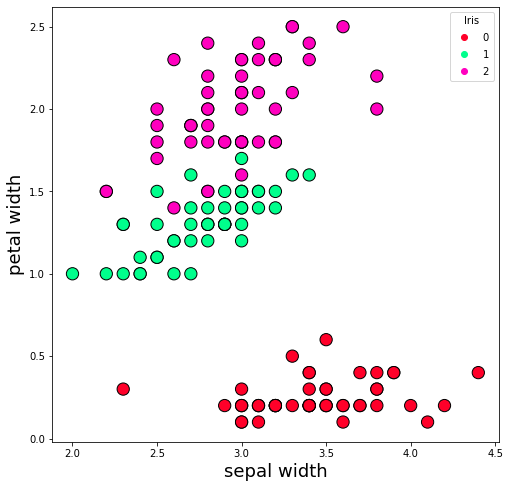

In [32]:
# Plot of sepal width and petal width
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1],c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
ax.legend(*scatter.legend_elements(),loc="best", title="Iris")
plt.xlabel('sepal width',fontsize = 18)
plt.ylabel('petal width',fontsize = 18);

In [33]:
# perform the clustering
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [34]:
# labels for comparison plot
new_labels = kmeans.labels_

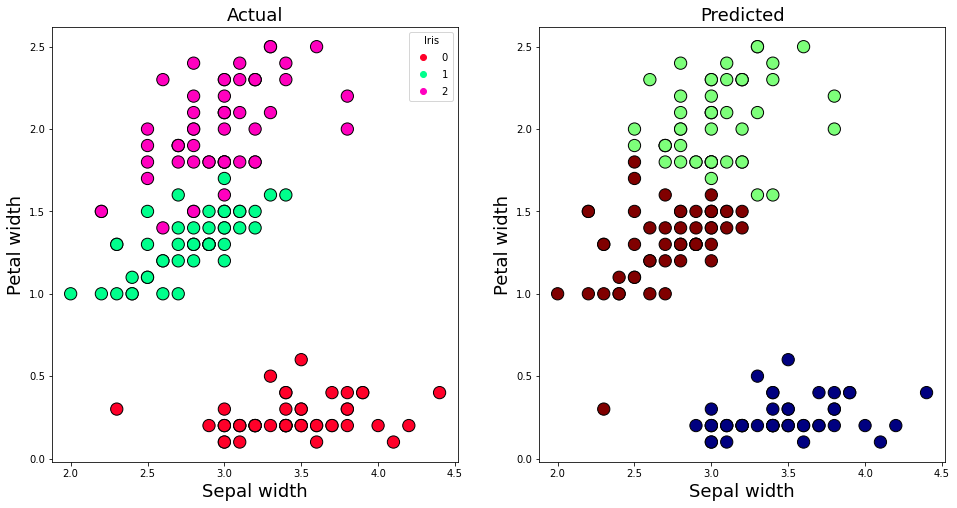

In [35]:
# Comparison plot of actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Sepal width', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Sepal width', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

### Petal length, Petal width
Using petal length and petal width, I will attempt to cluster the dataset.

In [36]:
# Create a numpy array for clustering
X = df[['petal_length','petal_width']].to_numpy()

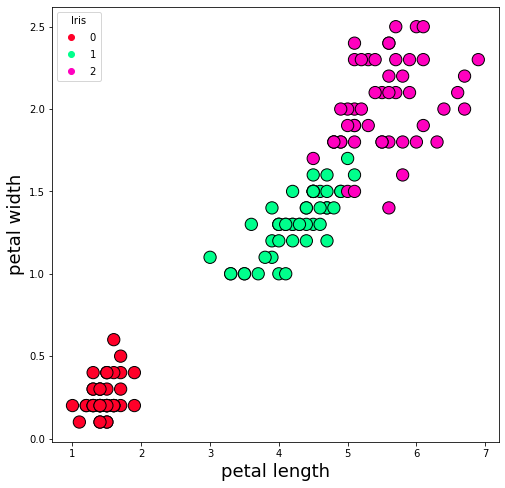

In [37]:
# Plot of sepal width and petal width
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1],c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
ax.legend(*scatter.legend_elements(),loc="best", title="Iris")
plt.xlabel('petal length',fontsize = 18)
plt.ylabel('petal width',fontsize = 18);

In [38]:
#Perform the clustering
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [39]:
# labels for the comparison plot
new_labels = kmeans.labels_

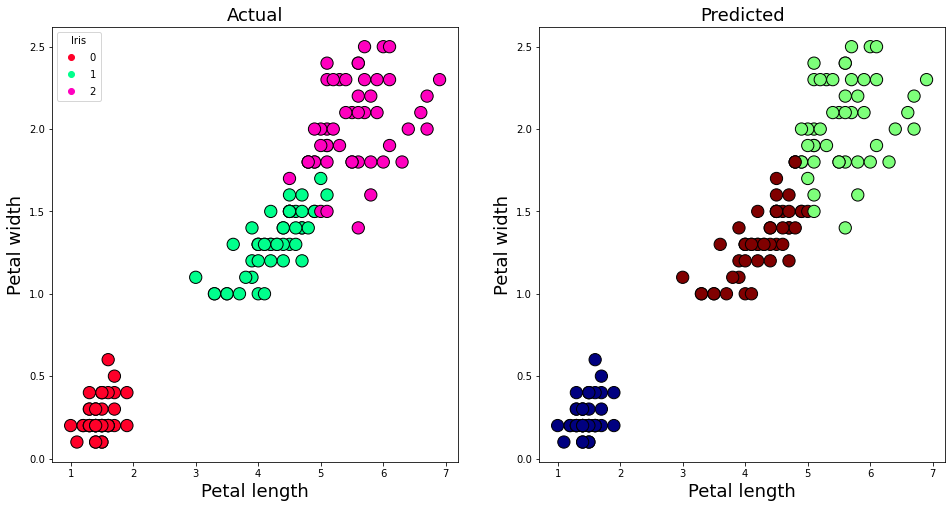

In [40]:
# Comparison plot of actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolors= 'k', s=150)
axes[0].legend(*scatter.legend_elements(),loc="best", title="Iris")
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolors= 'k', s=150)

axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

## References

[1] https://stackoverflow.com/questions/4733173/how-can-i-show-an-irrational-number-to-100-decimal-places-in-python

[2] https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[3] https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64

[4] http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf

[5] https://www.mathblog.dk/project-euler-80-digits-irrational-square-roots/

https://www.overleaf.com/learn/latex

[6] https://www.socscistatistics.com/tests/chisquare2/default2.aspx

[7] https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

[8] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency

[9] https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096#Example_chi-squared_test_for_categorical_data

[10] https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[11] https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[12] https://www.mathsisfun.com/data/standard-deviation-formulas.html

[13] https://en.wikipedia.org/wiki/Standard_deviation

[14] https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee